# Simple Liner Regression - CASE 1 (Salary Hike )

# Import Libraries

In [1]:
import math
import sklearn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import statsmodels.formula.api as sm


from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import spearmanr


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

# Import Data

In [2]:
salary=pd.read_csv("Salary_Data.csv")
salary.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
salary.shape

(30, 2)

In [4]:
salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
salary["Salary"].mean()

76003.0

# Data Validation and Cleaning

In [6]:
# Checking for 0 values or other invalid values
salary.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

# Check if the data is balanced and Normally distributed

In [7]:
salary["YearsExperience"].value_counts()

3.2     2
4.0     2
1.1     1
5.3     1
10.3    1
9.6     1
9.5     1
9.0     1
8.7     1
8.2     1
7.9     1
7.1     1
6.8     1
6.0     1
5.9     1
5.1     1
1.3     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
10.5    1
Name: YearsExperience, dtype: int64

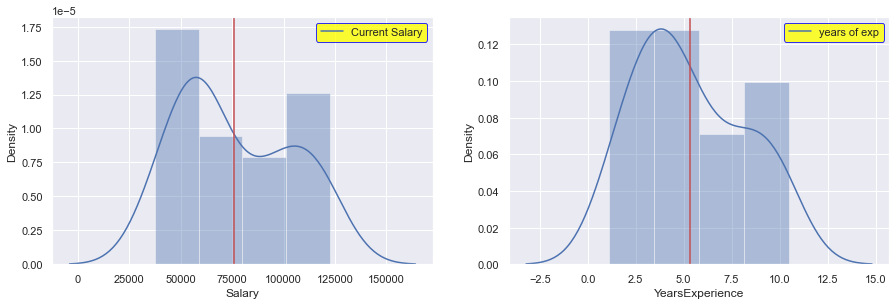

In [8]:
# Visualizing the distribution using histogram
sns.set(rc={"figure.figsize": (15,10)})
#creating first plot 
plt.subplot(2,2,1)
SalaryHike = sns.distplot(salary['Salary'])
plt.axvline(salary["Salary"].mean(),color='r')
plt.legend(["Current Salary"],loc='upper right',facecolor='yellow',edgecolor='blue')

# Creating the second plot

plt.subplot(2,2,2)
SortingTime = sns.distplot(salary['YearsExperience'])
plt.axvline(salary["YearsExperience"].mean(),color='r')
plt.legend(["years of exp"],loc='upper right',facecolor='yellow',edgecolor='blue')

#plt.show()

In [9]:
salary.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

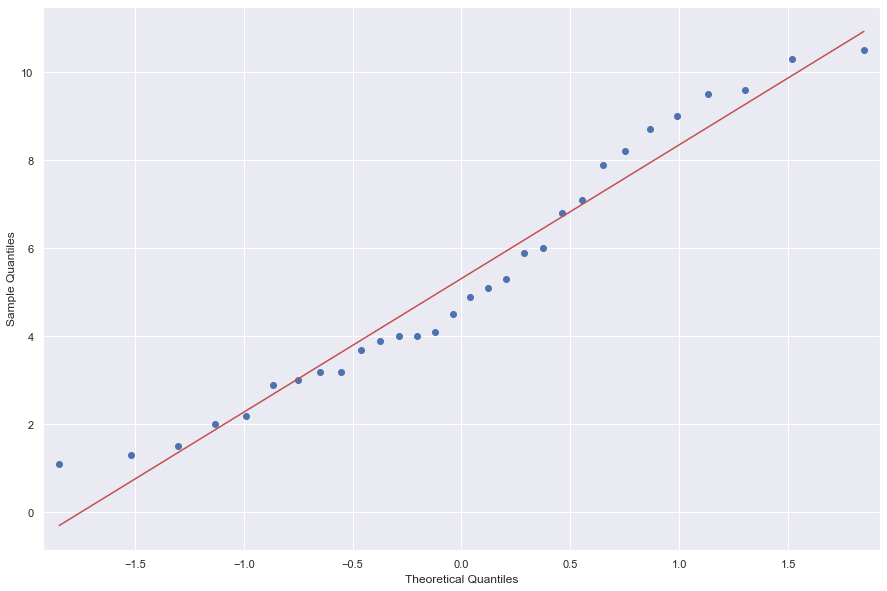

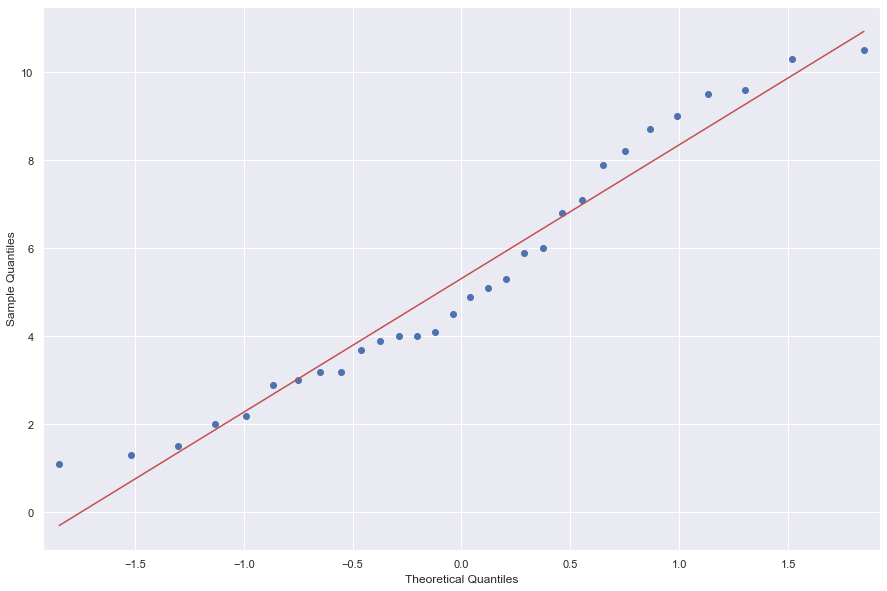

In [10]:
# draw QQ plot to check for the normality 

import statsmodels.api as sm

sm.qqplot(salary["YearsExperience"],line ='r')

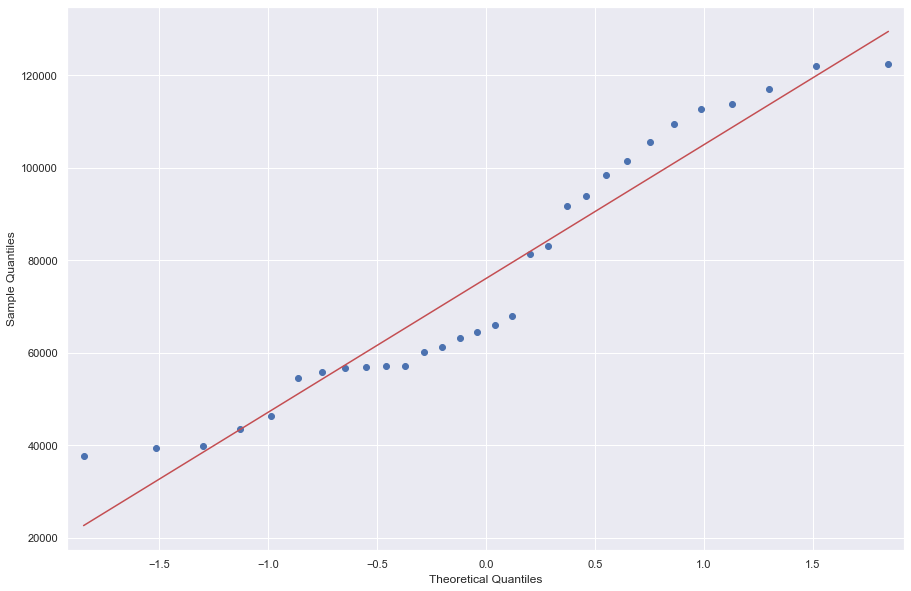

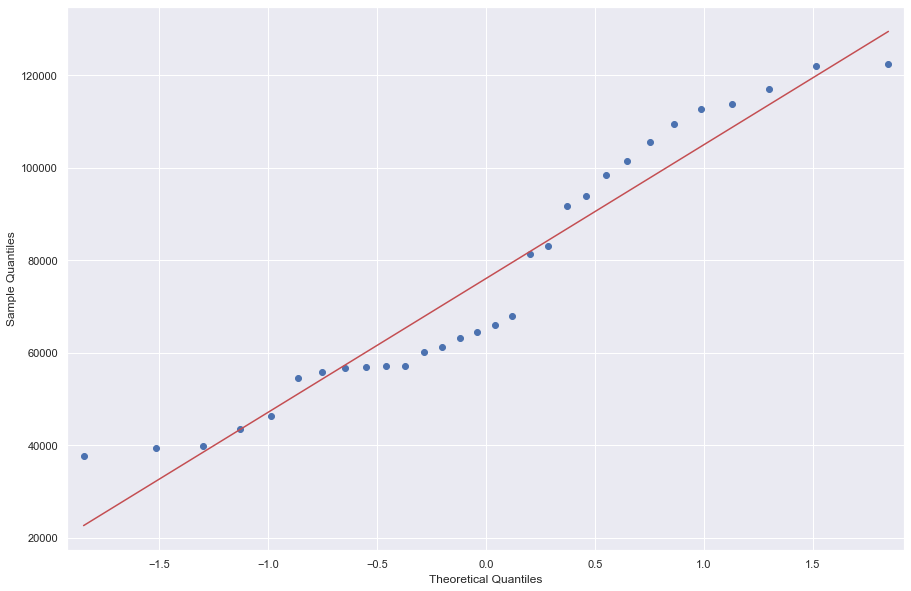

In [11]:
sm.qqplot(salary["Salary"],line ='r')

In [12]:
# Shappiro test to check the data normalisation for Years of experience

from scipy.stats import shapiro

DataToTest=salary["YearsExperience"]



stat,p = shapiro(DataToTest)

print('stat=%.2f, p=%.3f' % (stat,p))

if p > .05:
    print("Accept NUll Hypothesis: Normal Distribution")
else:
    print("Reject NUll Hypothesis:  Not normal distribution")

stat=0.94, p=0.103
Accept NUll Hypothesis: Normal Distribution


# Checking Correlation 

In [13]:
# Spearman and Pearseon Corelation for continous variables

from scipy.stats import spearmanr


firstsample=salary["YearsExperience"]
secondsample=salary["Salary"]



stat,p = spearmanr(firstsample,secondsample)

print('stat=%.2f, p=%.8f' % (stat,p))

if p > .05:
    print("independent variables")
else:
    print("dependent variables")

stat=0.96, p=0.00000000
dependent variables


In [14]:
salary.corr(method='spearman')

,YearsExperience,Salary
YearsExperience,1.000000,0.956831
Salary,0.956831,1.000000


In [15]:
salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

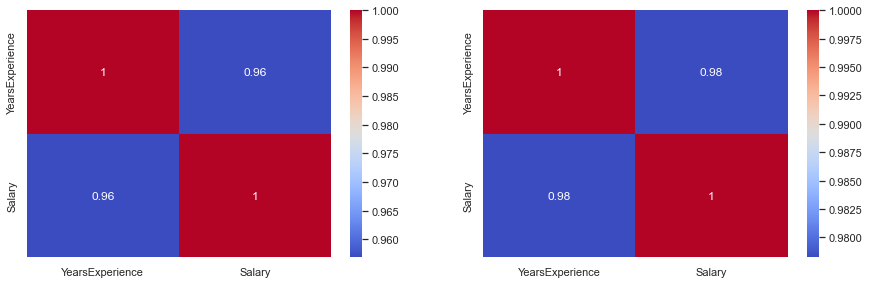

In [16]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.heatmap(salary.corr(method='spearman'),annot=True,cmap="coolwarm")

plt.subplot(2,2,2)
sns.heatmap(salary.corr(),annot=True,cmap="coolwarm")


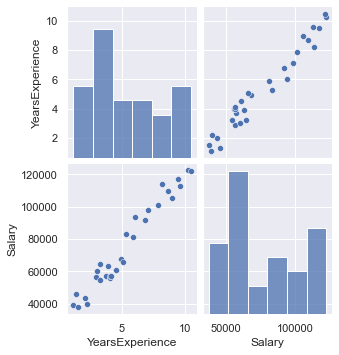

In [17]:
sns.pairplot(salary)

Text(0, 0.5, 'Salary')

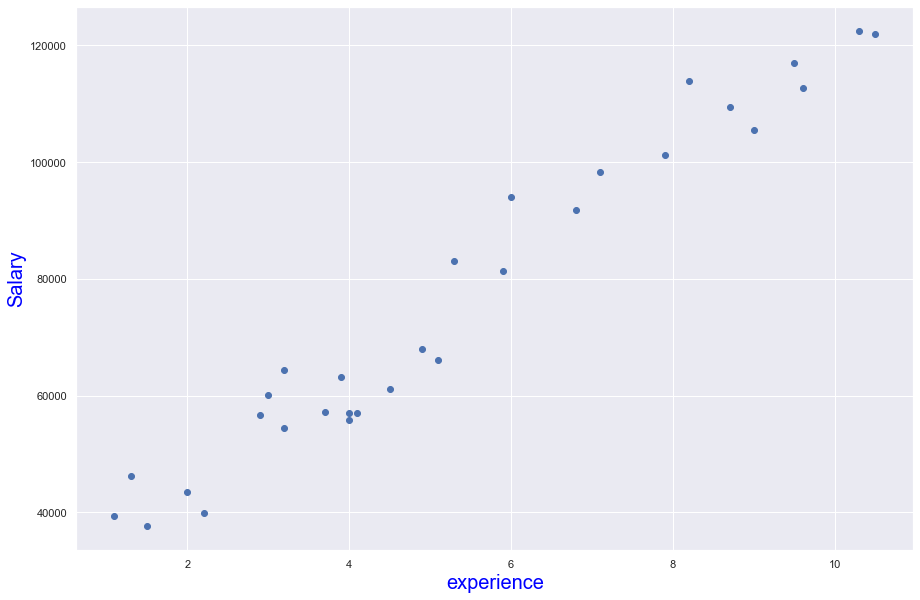

In [18]:
# plotting the scatter plot scatter plot
plt.scatter(salary["YearsExperience"],salary["Salary"],label="actual")


plt.xlabel("experience",size=20,color="blue")
plt.ylabel("Salary",size=20,color="blue")

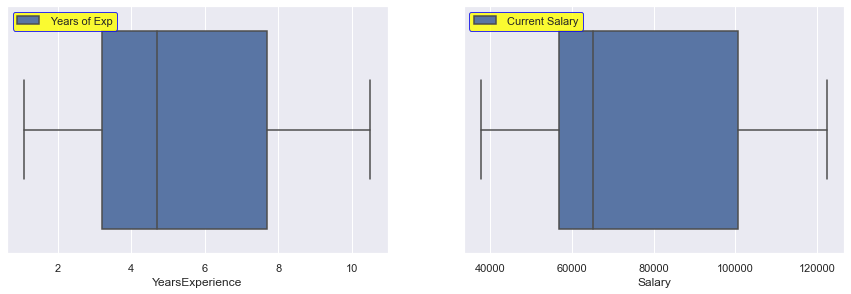

In [19]:
# Using boxplots to detect outliers

#creating first plot 
plt.subplot(2,2,1)
#graph=sns.catplot(x='DeliveryTime',kind='box',data=dt)
graph = sns.boxplot(x=salary['YearsExperience'])
plt.legend([' Years of Exp'],loc='upper left',facecolor='yellow',edgecolor='blue')

# Creating the second 
plt.subplot(2,2,2)
#graph=sns.catplot(x='SortingTime',kind='box',data=dt)
graph = sns.boxplot(x=salary['Salary'])
plt.legend([" Current Salary"],loc='upper left',facecolor='yellow',edgecolor='blue')

#plt.tight_layout(5) 
plt.show()

# Create Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
X=salary["YearsExperience"].values.reshape(-1,1)
y=salary["Salary"].values.reshape(-1,1)

In [22]:
model1 = LinearRegression()

model1.fit(X,y)

LinearRegression()

In [23]:
print (model1.coef_)# Value "a" 
print (model1.intercept_)# value "b"

[[9449.96232146]]
[25792.20019867]


In [24]:
y_pred=model1.predict(X)

In [25]:
r2_score(y,y_pred)

0.9569566641435086

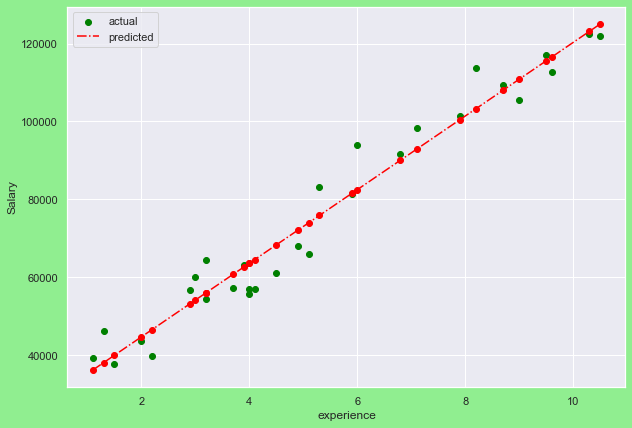

In [26]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(salary["YearsExperience"],salary["Salary"],color="green",label="actual")
plt.plot(X,y_pred,label="predicted",color="red",linestyle="-.");
plt.scatter(X,y_pred,color="red")
plt.xlabel("experience");
plt.ylabel("Salary")

plt.legend(loc="best")
plt.show()



# Creating Liner regression using Stats Model

## RAW data

In [27]:
import statsmodels.formula.api as sm
model2 = sm.ols("Salary~YearsExperience", data=salary).fit()

In [28]:
model2.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           1.14e-20
Time:                        08:19:11   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_pred=model2.predict(salary["YearsExperience"])
y=salary["Salary"]
#y_pred=model2.predict(X)

In [31]:
# Checking MSE
from sklearn.metrics import mean_squared_error


mse2=mean_squared_error(y,y_pred)
mse2

31270951.722280968

In [32]:
rmse2=np.sqrt(mse2)
rmse2

5592.043608760662

## Creating Model 3 with log(X)

In [33]:
model3= sm.ols('Salary~np.log(YearsExperience)',data=salary).fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           3.25e-13
Time:                        08:19:11   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Creating Model 4 with ep(X)

In [34]:
model4= sm.ols('np.log(Salary)~YearsExperience',data=salary).fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):           7.03e-18
Time:                        08:19:11   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Create Model Using Standardisation and Normalisation

## Standardisation

In [35]:
from sklearn.preprocessing import StandardScaler
sal_array=salary.values
stanscaler_sal= StandardScaler().fit(sal_array).transform(sal_array)
stanscaler_sal[0:3]

array([[-1.51005294, -1.36011263],
       [-1.43837321, -1.10552744],
       [-1.36669348, -1.419919  ]])

In [36]:
import statsmodels.api as sm
X=stanscaler_sal[:,1]
y=stanscaler_sal[:,0]
model_standard=sm.OLS(X,y).fit()
model_standard.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              644.7
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                    2.33e-21
Time:                        08:19:11   Log-Likelihood:                          4.6151
No. Observations:                  30   AIC:                                     -7.230
Df Residuals:                      29   BIC:                                     -5.829
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9782      0.039     25.392      0.000       0.899       1.057
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normalisation

In [37]:
# Normalizing the dataset
from sklearn.preprocessing import MinMaxScaler
sal_array=salary.values
norm_dt= MinMaxScaler().fit(sal_array).transform(sal_array)
norm_dt[0:3]

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ]])

In [38]:
X=norm_dt[:,1]
y=norm_dt[:,0]
model_norm=sm.OLS(X,y).fit()
model_norm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              1957.
Date:                Tue, 08 Nov 2022   Prob (F-statistic):                    3.58e-28
Time:                        08:19:11   Log-Likelihood:                          38.606
No. Observations:                  30   AIC:                                     -75.21
Df Residuals:                      29   BIC:                                     -73.81
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0210      0.023     44.238      0.000       0.974       1.068
==============================================================================
Omnibus:                        1.478   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.478   Jarque-Bera (JB):                1.229
Skew:                           0.310   Prob(JB):                        0.541
Kurtosis:                       2.226   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking MSE amd RMSE

In [39]:
y_pred=model_norm.predict(X)

In [40]:
# Checking MSE
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y,y_pred)
mse


0.005172661645642436

In [41]:
# Calculating RMSE

rmse = np.sqrt(mse)  
rmse

0.07192121832701692

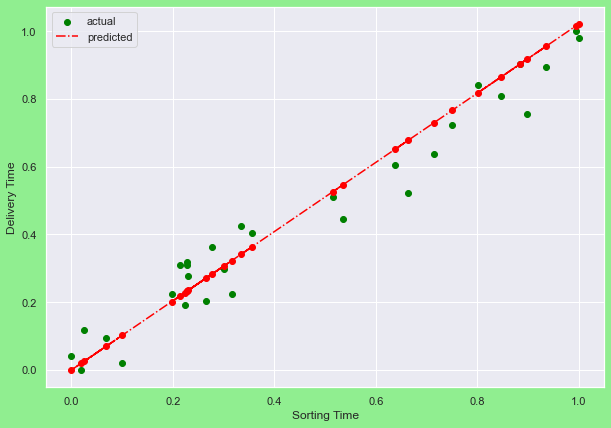

In [42]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(X,y,color="green",label="actual")
plt.plot(X,y_pred,label="predicted",color="red",linestyle="-.");
plt.scatter(X,y_pred,color="red")
plt.xlabel("Sorting Time");
plt.ylabel("Delivery Time")

plt.legend(loc="best")
plt.show()



# Inferences:
## From all the analysis it can be derived that we are 98% confident that Normalised (min-max scaler) model (rorm_model) is a good fit if all the conditions are met per model algo.
# 1. MSE and RMSE value close to 0 also predicts accuracy of the model tht meets the requirement.


In [43]:
#creating dataframe of results of all models
results=pd.DataFrame({'Models':['raw','log(x)','exp(x)','standardisation','normalisation'],
                        'R values':[model2.rsquared,model3.rsquared,model4.rsquared,model_standard.rsquared,model_norm.rsquared],
                        'RMSE':["NA","NA","NA","NA",rmse],
                         "MSE":["NA","NA","NA","NA",mse]})
results

,Models,R values,RMSE,MSE
0,raw,0.956957,NA,NA
1,log(x),0.853889,NA,NA
2,exp(x),0.931967,NA,NA
3,standardisation,0.956957,NA,NA
4,normalisation,0.985398,0.071921,0.005173
